# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [7]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [8]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))

medv is the target variable, a Median value of the owner-ocucpied home in $1000s. Together with other dataset params, it predicts housing prices.
dis represents the weighted distance to five Boston employment centres. It can affect the value of medv. 

_(ii)_ What concept ‘defines’ the plotted line?

it defines a linear regresion model used to understand the relationship between two variables. Predicting medv based on dis defined by medv = m*dis + c where 'm' is the slope fo the line (effect of dis on medv) and 'c' is the intercept of medv (when dis=0);

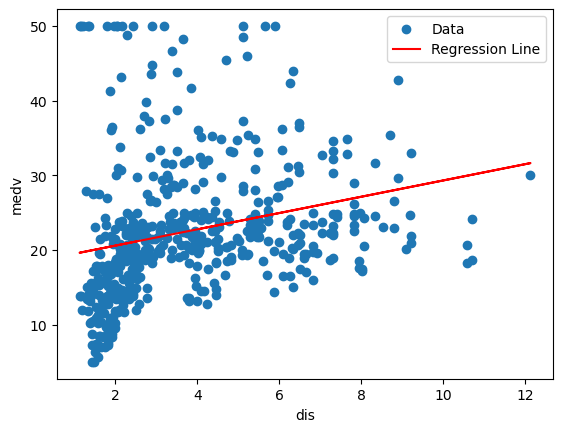

In [9]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?

The null hypotheis: there is no relationship btwn. the weighted distance to Boston employment centres and the median value of owner-occupied homes, beta=0;
The alternative hypothesis conversely states that there IS a relationship btwn. the weighted distance to Boston employment centres and the median value of owner-occupied homes, beta >< 0;

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

In [28]:
import statsmodels.api as sm

# Define response variable Y and predictor variable X
Y = Boston['medv']
X = Boston['dis']

# Add a constant to the predictor variable
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(Y, X)
results = model.fit()


Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?

B_0$ (intercept) and $B_1$ (slope) are: 18.3901 and  1.0916 resepectively;

_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?

_standard errors_ for $B_0$ and $B_1$ are: 0.817 and 0.188 resepectively;

_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  

_confidence intervals_ for $B_0$ and $B_1$ are: 16.784 ... 19.996 and 0.722 ... 1.462 resepectively.

In [29]:
# Print the summary statistics of the regression model
print(results.summary())
print(results.conf_int())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        19:11:40   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0


Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)
as the R-squared was 0.0062 the model explains 6.2% of the variabiliity in the responce variable. It is very low and the large part of the variability is not explained by the model. This model is not a good fit.
   
_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).
based on $F$ statistic (33.58) and $p$ value (1.21e-08), which is smaller than 0.05, this model is statistically significant, and the null hypothesis should be rejected. 

### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [30]:
# Preparing the data
X = Boston[['dis', 'rm']]
Y = Boston['medv']
X = sm.add_constant(X)

# Fit the dist to medv linear regression
multiple_linear = sm.OLS(Y, X).fit()

# Summary of the model
print(multiple_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.84e-75
Time:                        19:37:23   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.0

_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

When looking at the relationship between a specific predictor (like average number of rooms per dwelling) and the response variable (like Median value of owner-occupied homes), the hypotheses could be stated as follows:
Null Hypothesis (H0): There is no relationship between the predictor variable and the response variable. 
Alternative Hypothesis (H1): There is a relationship between the predictor variable and the response variable.

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?

If the p-value is less than chosen (typically 0.05) the null-hypothesis can be rejected as in this case. 

_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). 

Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

Text(0.5, 1.0, 'Residual vs. Fitted')

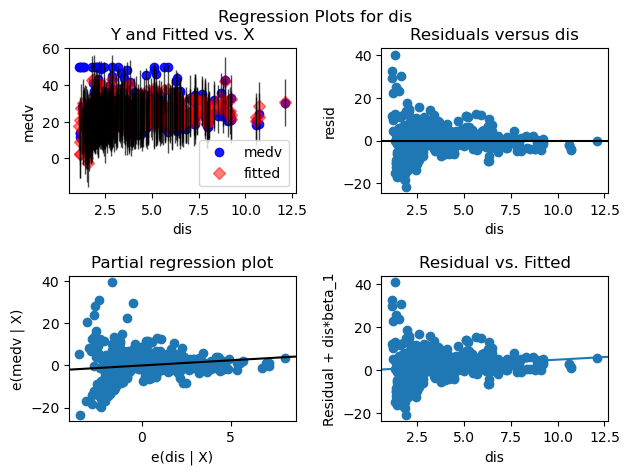

In [37]:

X = pd.DataFrame({'dis': dis, 'rm': rm})
X = sm.add_constant(X)

model = sm.OLS(medv, X).fit()
sm.graphics.plot_regress_exog(model, 'dis')
plt.title('Residual vs. Fitted')

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

In [33]:
# Add your code here
multi_linear = sm.OLS.from_formula('medv ~ dis * rm', data=Boston)
output_interaction = multi_linear.fit()

# Summary of the regression
print(output_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           8.37e-79
Time:                        19:59:20   Log-Likelihood:                -1656.5
No. Observations:                 506   AIC:                             3321.
Df Residuals:                     502   BIC:                             3338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2533      4.895     -3.116      0.0

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
